In [3]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2) #2 qubits and 2 bits

#currently 0,0
circuit.x(0) # applying not gate on circuit
# 1,0
circuit.cx(0,1) #flips 2nd cubit value if 1st is a 1

circuit.measure([0,1],[0,1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [6]:
from qiskit import IBMQ

IBMQ.save_account(open("token.txt", "r").read())

configrc.store_credentials:WARNING:2020-12-17 11:55:30,318: Credentials already present. Set overwrite=True to overwrite.


In [8]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-12-17 11:57:48,802: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [10]:
provider = IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")    

ibmq_qasm_simulator has 14 queued and simulated qubits
ibmqx2 has 1 queued and 5 qubits
ibmq_16_melbourne has 3208 queued and 15 qubits
ibmq_vigo has 802 queued and 5 qubits
ibmq_ourense has 1 queued and 5 qubits
ibmq_valencia has 0 queued and 5 qubits
ibmq_armonk has 9 queued and 1 qubits
ibmq_athens has 25 queued and 5 qubits
ibmq_santiago has 18 queued and 5 qubits


In [11]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmq_valencia")
job = q.execute(circuit, backend = backend, shots = 500)

job_monitor(job)

Job Status: job has successfully run


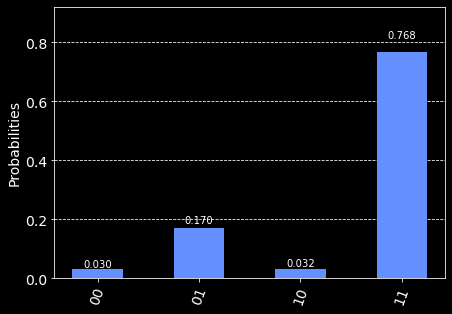

In [12]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use("dark_background")

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

In [13]:
backend = provider.get_backend("ibmq_qasm_simulator")

circuit = q.QuantumCircuit(2,2) #2 qubits and 2 bits

#currently 0,0
circuit.h(0) # applying not gate on circuit
# 1,0
circuit.cx(0,1) #flips 2nd cubit value if 1st is a 1

circuit.measure([0,1],[0,1])

circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

In [14]:
job = q.execute(circuit, backend = backend, shots = 500)

job_monitor(job)

Job Status: job has successfully run


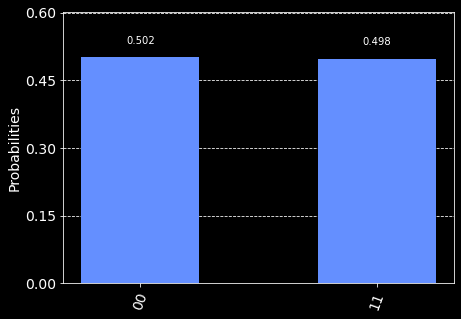

In [15]:

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])